In [17]:
import numpy as np 
import torch
import torchvision.transforms as tf
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
def show_tensor_image(tensor,title = 'None', mean = None, std_dev= None):
    mean = torch.tensor([0.5]*3) if mean is None else mean
    std = torch.tensor([0.5]*3) if std_dev is None else std_dev

    # Clone the tensor to not make changes to the original
    image = tensor.clone().detach()
    
    # Convert from Tensor image
    image = image.to(torch.device('cpu'))

    # Revert the tensor normalization
    image = tf.Normalize(-mean / std, 1.0 / std)(image)
    
    # Change the order of dimensions from (C, H, W) to (H, W, C) for displaying
    image = image.permute(1, 2, 0)
    
    # Clip to ensure it's within valid image range
    image = torch.clamp(image, 0, 1)
    
    # Show image
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


In [6]:
img = Image.open('./cat.png')

To Tensor Format

In [9]:
transform = tf.Compose([tf.ToTensor()])
tensor_img = transform(img)
tensor_img.shape #C,H,W

torch.Size([3, 384, 384])

In [28]:
transforms = tf.Compose(
    [tf.ToTensor(),
     tf.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
     #mean and stddev for 3 channels
     tf.CenterCrop((250,250))])

tensor_img = transforms(img)

In [29]:
tensor_img.shape

torch.Size([3, 250, 250])

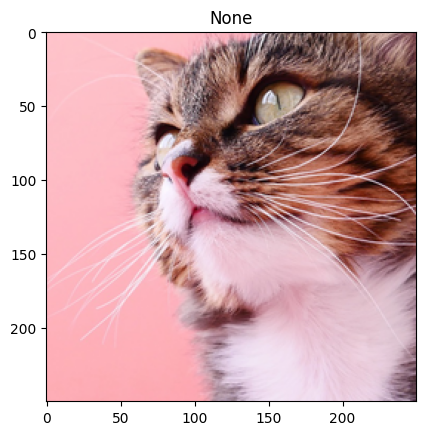

In [30]:
show_tensor_image(tensor_img)